In [96]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:
import bs4
import requests as ur
from bs4 import BeautifulSoup as Soup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [237]:
########## Scraping --> nous avons définie certaines fonctions qui nous aiderons à cibler l'information du code source:
    ########## Nous avons ciblé les scriptes puisqu'elles contiennent toutes les informations nécessaires.
def Price(J):
    J1 =J.find('\'Price\'    : ')
    J=J[J1+12:]
    J2=J.find('\n')
    return J[3:J2-3]+' DH'
def Ville(J):
    J1 =J.find('\'City\'         : ')
    J=J[J1+16:]
    J2=J.find('\n')
    return J[3:J2-3]
def Date(J):
    J1 =J.find('\'PublishDate\'')
    J=J[J1+15:]
    J2=J.find('\n')
    return J[3:13]
def Heur(J):
    J1 =J.find('\'PublishDate\'')
    J=J[J1+15:]
    J2=J.find('\n')
    return J[14:J2-3]
def Catégorie(J):
    J1 =J.find('\'MainCategory\'')
    J=J[J1+15:]
    J2=J.find('\n')
    return J[4:J2-3]
def ID(J):
    J1 =J.find('\'ID\'')
    J=J[J1+14:]
    J2=J.find('\n')
    return J[4:J2-2]
def NameTitre(J):
    J1 =J.find('\"name\"')
    J=J[J1+5:]
    J2=J.find('\n')
    J3=J.find('\"name\"')
    J4=J[J3+5:]
    J5=J4.find('\n')
    return[J[4:J2-2],J4[4:J5-1]]
def Desc(J):
    J1 =J.find('\"description\"')
    J=J[J1+15:]
    J2=J.find('\n')
    return J[1:J2-2]
def numerau(J):
    J1 =J.find('telephone: ')
    J=J[J1+10:]
    J2=J.find('\n')
    return J[2:J2-2]
def Annonces(soup):
    x=soup.findAll('script',type="text/javascript")[12]
    J = str(x)
    x1=soup.findAll('script',type="application/ld+json")
    J0 = str(x1)
    x2=soup.findAll('script',type="text/javascript")
    J9=str(x2)
    nametitre=NameTitre(J0)
    Annonce=np.array([ID(J),nametitre[1],nametitre[0],Catégorie(J),Price(J),Ville(J),numerau(J9),Date(J),Heur(J),Desc(J0)])
    return Annonce
#Il s'agit d'un petit test pour tester la validité des fonctions (nous avons testé plusieurs annonces)
my_url = 'https://www.avito.ma/fr/es_saada/t%C3%A9l%C3%A9phones/Oppo_a3s_39980099.htm'
uClient=ur.get(my_url)
soup=Soup(uClient.text,'lxml')
Annonces(soup)

array(['51149308', 'Sara Sus Queen', 'Oppo a3s',
       'INFORMATIQUE ET MULTIMEDIA', ' DH', 'Marrakech', '0662194249',
       '2020-03-29', '18:52:2', 'Oppo a3s 16g'], dtype='<U26')

In [238]:
#Representations des Datas dans une dataframe bien organisée dataframe=pd.DataFrame(columns=['ID', 'Nom','Titre','Catégorie','Prix','Ville','Téléphone','Date','Heur','Description'])
my_url ='https://www.avito.ma/fr/ahlane/t%C3%A9l%C3%A9phones/Iphone_7_black_128G_39977692.htm'
uClient=ur.get(my_url)
soup=Soup(uClient.text,'lxml')
dataframe.loc[1] = Annonces(soup)
dataframe

,ID,Nom,Titre,Catégorie,Prix,Ville,Téléphone,Date,Heur,Description
1,51145316,Majid,Iphone 7 black 128G,INFORMATIQUE ET MULTIMEDIA,2100 DH,Tanger,0663769393,2020-03-28,23:58:1,Iphone 7 noir 128G très bon état batteries 90...


In [ ]:
#### Il s'agit du programme du scraping et d'enregistrement dans un fichier EXCEL avec un temps d'execution d'environ 3min les 10 pages c'est à dire les 350 annonces
#### Nous avons tirez à peu prés 70 000 annonces que nous avons traité par la suite.
url='https://www.avito.ma/fr/maroc/?o='
i=1
for j in range (0,13000):
    url1='https://www.avito.ma/fr/maroc/?o='+str(j)
    uClient=ur.get(url1)
    soup=Soup(uClient.text,'lxml')
    x1=soup.findAll('a',tabindex="1")
    for link in x1:
        my_url = str(link['href'])
        uClient=ur.get(my_url)
        soup=Soup(uClient.text,'lxml')
        dataframe.loc[i] = Annonces(soup)
        i=i+1
    dataframe.to_excel(r'AvitoDatascraping10.xlsx')    
    print(j, "done")

In [3]:
# importation du dataframe avec la quelle nous allons travaillé.
df2=pd.read_excel("AvitoDatascraping10.xlsx")
df2

,Unnamed: 0,ID,Nom,Titre,Catégorie,Prix,Ville,Téléphone,Date,Heur,Description
0,1,46135361,Monde Meuble,chaise plus accoudoirs Italie,ENTREPRISES,160.0,Rabat,674060304,2020-03-29,13:53:1,MAGASIN A RABAT chaise avec cash plastique b...
1,2,51070557,Animalerie Riviera,épagneul breton 2 mois,LOISIRS ET DIVERTISSEMENT,NaN,Casablanca,632917225,2020-03-29,13:53:1,épagneul breton 2 mois
2,3,51106555,Al Watani Immo,Appartement meublée à lazaret prés Centre Ville,IMMOBILIER,150.0,Oujda,661360143,2020-03-29,13:53:0,Attitre Ixeptionnaire de cette période maladé...
3,4,50764193,Mon salon groupe tissage benchrif mohamedia,متراج مشري و متراج فابور هي متخليوش عشرة ايام ...,POUR LA MAISON ET JARDIN,NaN,Casablanca,523287576,2020-03-29,13:52:5,الطلب موجود و العرض محدود على اروع ما تغنى في ...
4,5,38617280,Youssef,Appartement de 289 m2 Route d'Immouzere,IMMOBILIER,NaN,Fès,661450261,2020-03-29,13:52:4,Je vend un appartement meublé d&#39;une surfac...
...,...,...,...,...,...,...,...,...,...,...,...
71741,71745,50207352,abdelilah,Vêtements et chaussures pour enfants jusqu'à 1...,ENTREPRISES,75.0,Rabat,610096223,2020-02-10,13:49:2,Vêtements et chaussures pour enfants jusqu&#39...
71742,71746,50207392,Nasiri SHOP,LES CASQUES PRO FOR GAMES à Al Azhar,INFORMATIQUE ET MULTIMEDIA,NaN,Tétouan,633846900,2020-02-10,13:49:1,Bonjour à tous et bienvenue dans notre boutiqu...
71743,71747,50207382,"Mercedes-Benz"" }",classe c bluetec,VEHICULES,310000.0,Casablanca,661101165,2020-02-10,13:48:4,"bonjour, je mets en vente une Mercedes classe ..."
71744,71748,50207338,CNC Nour,cnc router,ENTREPRISES,NaN,Casablanca,669331561,2020-02-10,13:48:4,cnc router


In [242]:
#élimination de certaines erreur et de certaines annonces qui pourons fausée les statistiques Ex:Prix > 100000000 (20 lignes)
df2 = df2.drop(df2[df2.Prix == 'text/javascrip '].index)
df2 = df2.drop(df2[df2.Prix == 'text/javascrip'].index)
df2['Prix'] = pd.to_numeric(df2['Prix'])
df2 = df2.drop(df2[df2.Prix > 100000000].index)
df2

,Unnamed: 0,ID,Nom,Titre,Catégorie,Prix,Ville,Téléphone,Date,Heur,Description
0,1,46135361,Monde Meuble,chaise plus accoudoirs Italie,ENTREPRISES,160.0,Rabat,674060304,2020-03-29,13:53:1,MAGASIN A RABAT chaise avec cash plastique b...
1,2,51070557,Animalerie Riviera,épagneul breton 2 mois,LOISIRS ET DIVERTISSEMENT,NaN,Casablanca,632917225,2020-03-29,13:53:1,épagneul breton 2 mois
2,3,51106555,Al Watani Immo,Appartement meublée à lazaret prés Centre Ville,IMMOBILIER,150.0,Oujda,661360143,2020-03-29,13:53:0,Attitre Ixeptionnaire de cette période maladé...
3,4,50764193,Mon salon groupe tissage benchrif mohamedia,متراج مشري و متراج فابور هي متخليوش عشرة ايام ...,POUR LA MAISON ET JARDIN,NaN,Casablanca,523287576,2020-03-29,13:52:5,الطلب موجود و العرض محدود على اروع ما تغنى في ...
4,5,38617280,Youssef,Appartement de 289 m2 Route d'Immouzere,IMMOBILIER,NaN,Fès,661450261,2020-03-29,13:52:4,Je vend un appartement meublé d&#39;une surfac...
...,...,...,...,...,...,...,...,...,...,...,...
71741,71745,50207352,abdelilah,Vêtements et chaussures pour enfants jusqu'à 1...,ENTREPRISES,75.0,Rabat,610096223,2020-02-10,13:49:2,Vêtements et chaussures pour enfants jusqu&#39...
71742,71746,50207392,Nasiri SHOP,LES CASQUES PRO FOR GAMES à Al Azhar,INFORMATIQUE ET MULTIMEDIA,NaN,Tétouan,633846900,2020-02-10,13:49:1,Bonjour à tous et bienvenue dans notre boutiqu...
71743,71747,50207382,"Mercedes-Benz"" }",classe c bluetec,VEHICULES,310000.0,Casablanca,661101165,2020-02-10,13:48:4,"bonjour, je mets en vente une Mercedes classe ..."
71744,71748,50207338,CNC Nour,cnc router,ENTREPRISES,NaN,Casablanca,669331561,2020-02-10,13:48:4,cnc router


                               PrixMax      PrixMoyen
Catégorie                                            
Autres                        600000.0    5699.717445
ENTREPRISES                 55000000.0   93523.330834
HABILLEMENT ET BIEN ETRE    11111111.0    5033.220249
IMMOBILIER                  95000000.0  798425.327877
INFORMATIQUE ET MULTIMEDIA    400000.0    3570.231175
LOISIRS ET DIVERTISSEMENT    8000000.0    5271.249667
POUR LA MAISON ET JARDIN     1111111.0    2156.737434
VEHICULES                   15000000.0   69757.635070
Véhicules Professionnels    36000000.0  204592.439479


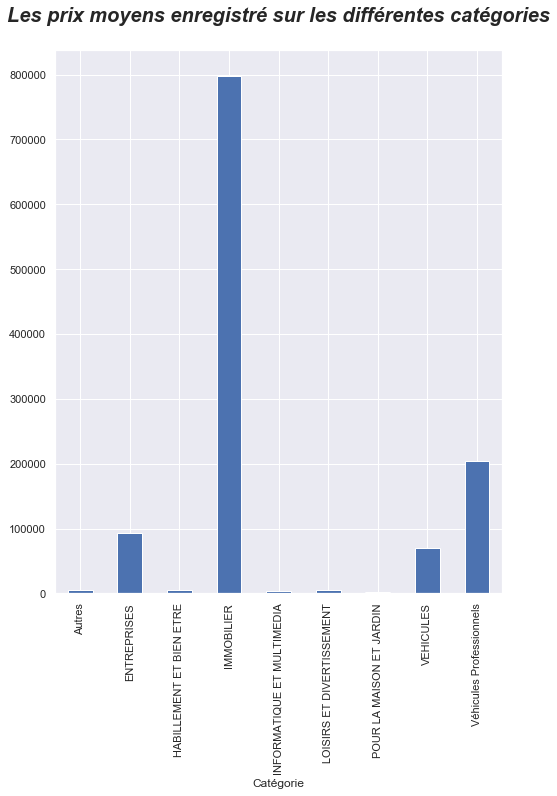

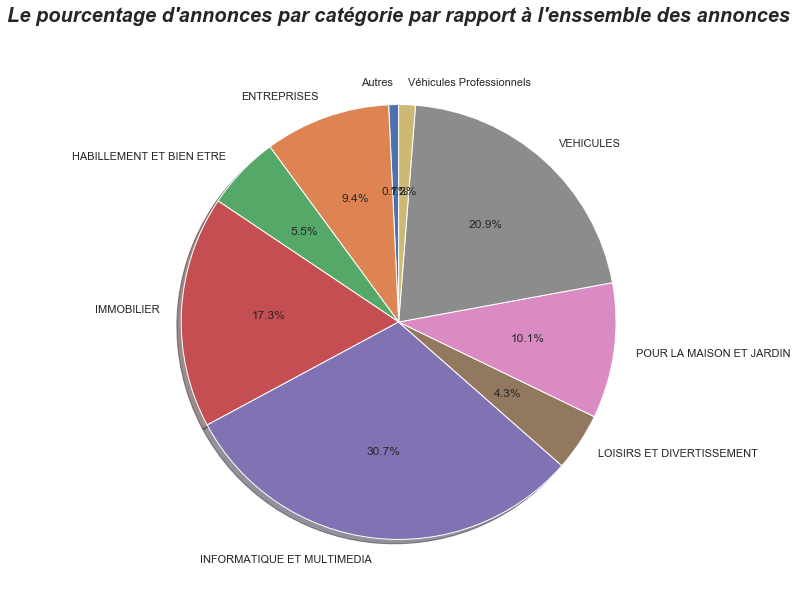

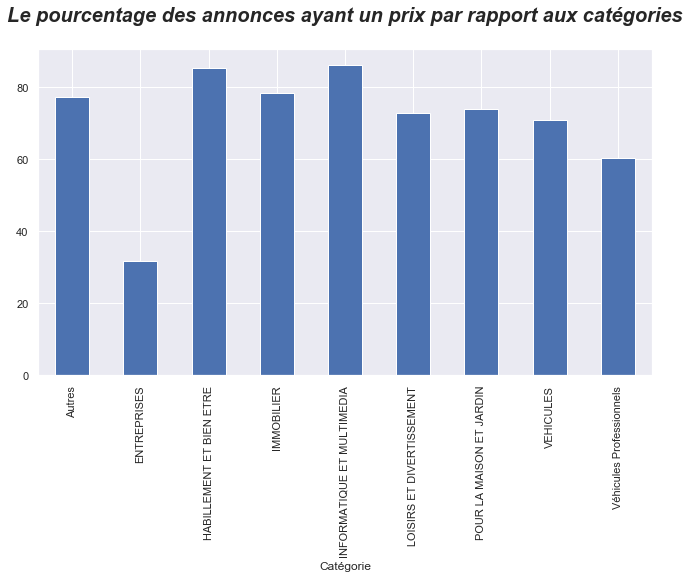

In [250]:
df11=pd.DataFrame((df2.groupby(['Catégorie']).count())[['Ville','Prix']])
df11['% annonces avec prix']=df11['Prix']*100/df11['Ville']
df11=df11['% annonces avec prix']
df7=pd.DataFrame((df2.groupby(['Catégorie']).mean())['Prix'])
df7=df7.rename(columns={'Prix':'PrixMoyen'})
df8=pd.DataFrame((df2.groupby(['Catégorie']).max())['Prix'])
df8=df8.rename(columns={'Prix':'PrixMax'})
df4=pd.DataFrame((df2.groupby(['Catégorie']).count())[['Ville']])
df4=df4.rename(columns={'Ville':'NbAnnonce'})
total=(df4.sum()).loc['NbAnnonce']
df4=pd.DataFrame(df4['NbAnnonce']*100/total)
df4=pd.DataFrame(df4.join(df11))
df8=pd.DataFrame(df8.join(df7))
print(df8)
seaborn.set()
df4=pd.DataFrame(df4.join(df8))
plt.figure(figsize = (8,10))
df4['PrixMoyen'].plot.bar()
plt.title('Les prix moyens enregistré sur les différentes catégories\n',fontsize=20,fontweight='bold',fontstyle='italic')

#évidement le prix moyen enregistré par l'IMMOBILIER est très grand par rapport aux autres moyennes

plt.figure(figsize = (10, 10))
plt.pie(np.array(df4['NbAnnonce']),labels=['Autres', 'ENTREPRISES','HABILLEMENT ET BIEN ETRE','IMMOBILIER','INFORMATIQUE ET MULTIMEDIA','LOISIRS ET DIVERTISSEMENT','POUR LA MAISON ET JARDIN','VEHICULES','Véhicules Professionnels'],startangle=90,shadow=True,autopct='%1.1f%%')
plt.title('Le pourcentage d\'annonces par catégorie par rapport à l\'enssemble des annonces\n',fontsize=20,fontweight='bold',fontstyle='italic')

#D'aprés une visualisation du graphe pie, les trois catégories qui dominent dans avito.ma sont 
#### 1 --> INFORMATIQUE ET MULTIMEDIA
#### 2 --> VEHICULES
#### 3 --> IMMOBILIER

plt.figure(figsize = (11,6))
df4['% annonces avec prix'].plot.bar()
plt.title('Le pourcentage des annonces ayant un prix par rapport aux catégories\n',fontsize=20,fontweight='bold',fontstyle='italic')

#On remarque que dans le domaine ENTREPRISES peu d'annonces contiennent le prix comme donnée.

plt.show()

            NbAnnonce  % Annonce avec prix     Moyen prix
Ville                                                    
Casablanca  30.725260            70.274072  143459.949635
Rabat       11.258121            76.544892  147916.686135
Tanger       6.496947            82.339056  197175.898879
Fès          4.112874            70.576271   87542.682037
Agadir       5.260296            74.529552  167722.449858
Marrakech    8.835011            77.449897  188227.547066
Autres      33.311491            66.755765  303727.113234


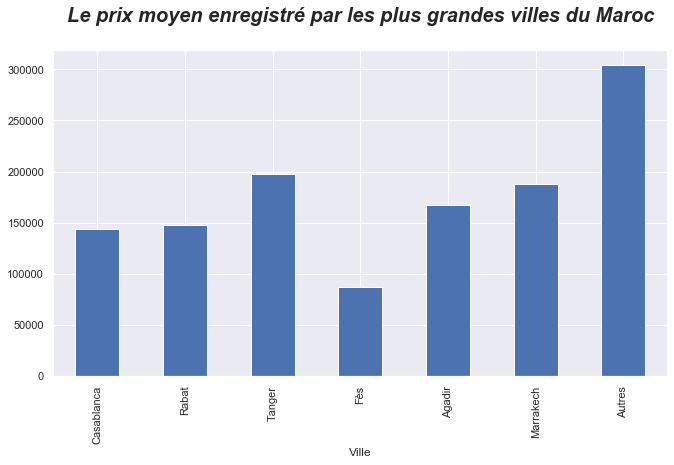

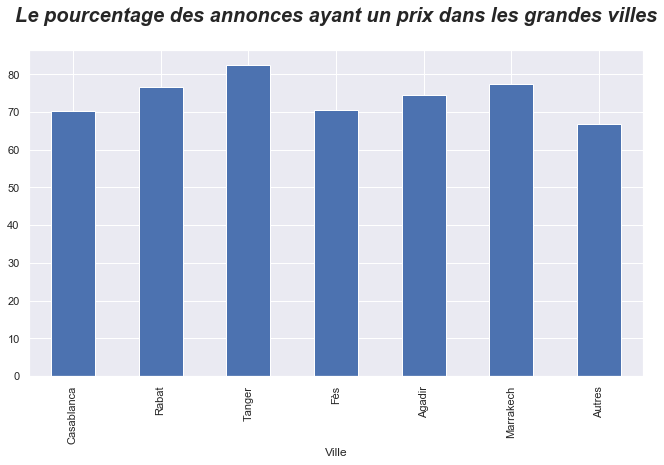

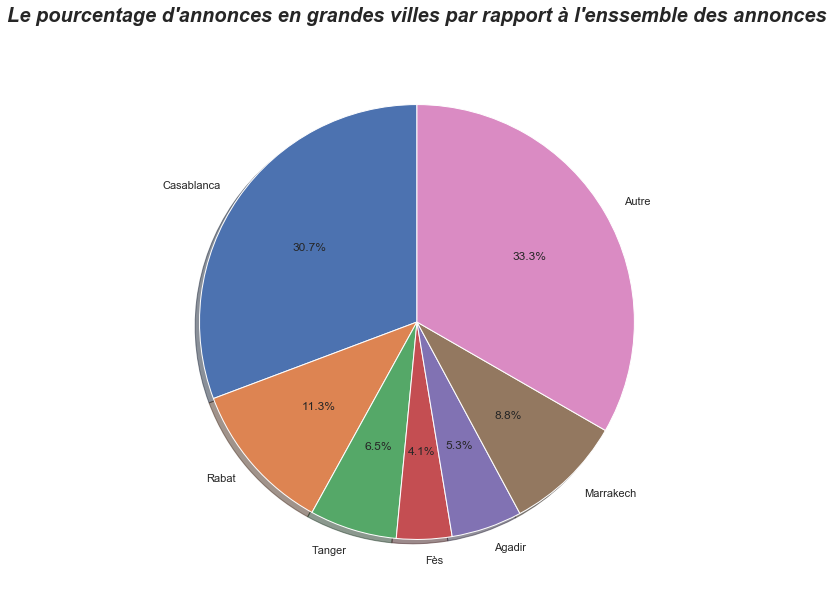

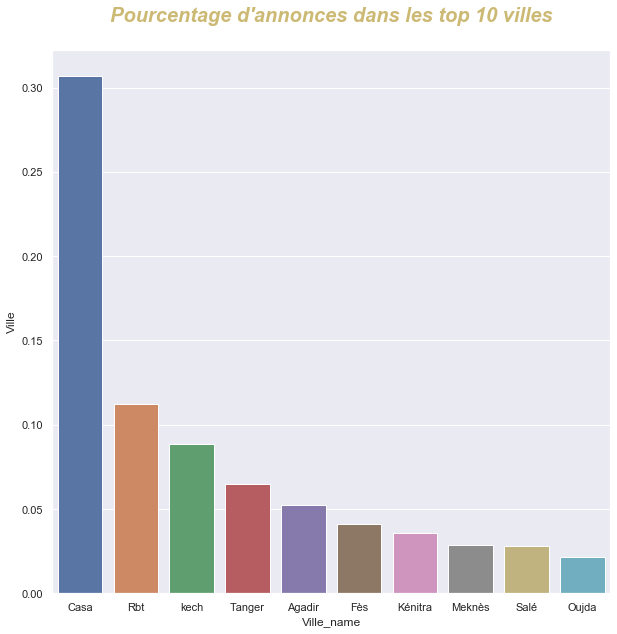

Casablanca    0.307154
Rabat         0.112545
Marrakech     0.088322
Tanger        0.064949
Agadir        0.052586
Fès           0.041116
Kénitra       0.035708
Meknès        0.028530
Salé          0.028223
Oujda         0.021310
Name: Ville, dtype: float64


In [268]:
seaborn.set()
df5=pd.DataFrame((df2.groupby(['Ville']).count())[['Catégorie','Prix']])
df5['Prix']=df5['Prix']*100/df5['Catégorie']
total=(df5.sum()).loc['Catégorie']
df5['Catégorie']=pd.DataFrame(df5['Catégorie']*100/total)
df5=df5.rename(columns={'Catégorie':'NbAnnonce'})
df5=df5.rename(columns={'Prix':'% Annonce avec prix'})
df3=pd.DataFrame(df2.groupby(['Ville']).mean()[['Prix']])
df3=df3.rename(columns={'Prix':'Moyen prix'})
df5=pd.DataFrame(df5.join(df3))
df20=df5.loc[['Casablanca', 'Rabat','Tanger','Fès','Agadir','Marrakech']]
df5 = df5.drop(df5.loc[['Casablanca', 'Rabat','Tanger','Fès','Agadir','Marrakech']].index)
total=(df5.sum()).loc['NbAnnonce']
moyen1=(df5.mean()).loc['% Annonce avec prix']
moyen2=(df5.mean()).loc['Moyen prix']
df20.loc['Autres'] = [total,moyen1,moyen2] 
print(df20)
plt.figure(figsize = (11,6))
df20['Moyen prix'].plot.bar(align='center')
plt.title('Le prix moyen enregistré par les plus grandes villes du Maroc\n',fontsize=20,fontweight='bold',fontstyle='italic')

#On peut remarquer que en moyenne le prix par rapport aux villes est de 170 000DHS sauf pour Fès 

plt.figure(figsize = (11,6))
df20['% Annonce avec prix'].plot.bar(align='center')
plt.title('Le pourcentage des annonces ayant un prix dans les grandes villes\n',fontsize=20,fontweight='bold',fontstyle='italic')

#Comme on peut remarquer, le pourcentage des annonces ayant un prix est presque le même par rapport aux villes et varie entre 70% et 80% de totale d'annonce par rapport aux villes

plt.figure(figsize = (10, 10))
plt.pie(np.array(df20['NbAnnonce']),labels=['Casablanca', 'Rabat','Tanger','Fès','Agadir','Marrakech','Autre'],startangle=90,shadow=True,autopct='%1.1f%%')
plt.title('Le pourcentage d\'annonces en grandes villes par rapport à l\'enssemble des annonces\n',fontsize=20,fontweight='bold',fontstyle='italic')
sns.set()
Ville=df2.Ville
S=Ville.value_counts()

## on prend le pourcentage de nombre d'annonces dans les 10 villes qui contiennent le plus grand nombre d'annonces

pourcentage_Dannonces_par_ville=S[:10]/71749
Ville_name=['Casa','Rbt','kech','Tanger','Agadir','Fès','Kénitra','Meknès','Salé','Oujda']
pourcentage_Dannonces_par_ville=pourcentage_Dannonces_par_ville.to_frame()
pourcentage_Dannonces_par_ville['Ville_name']=Ville_name

##on represente graphiquement ces pourcentages

plt.figure(figsize = (10, 10))
sns.barplot(x="Ville_name", y="Ville", data=pourcentage_Dannonces_par_ville)
sns.set(style="whitegrid")
title_obj=plt.title('Pourcentage d\'annonces dans les top 10 villes\n',fontsize=20,fontweight='bold',fontstyle='italic')
plt.setp(title_obj, color='y')
plt.show()

#Casablanca est la ville la plus actif dans le site d'avito, elle forme constitue 30.7 % du totale d'annonces dans le site. 

plt.show()
print(pourcentage_Dannonces_par_ville['Ville'])


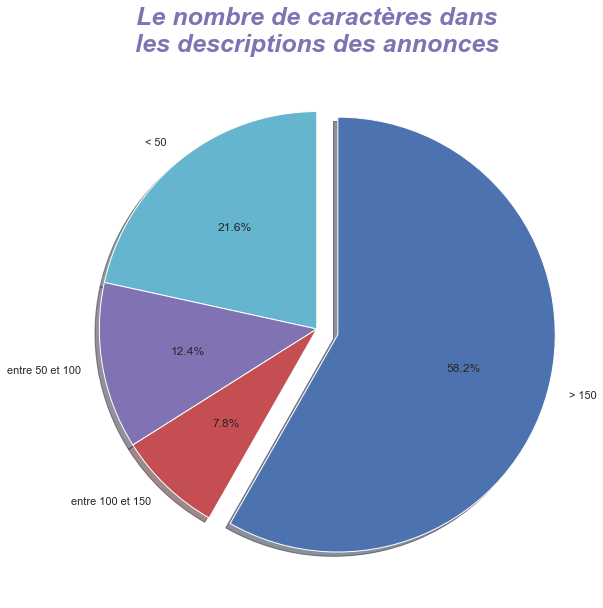

In [254]:
seaborn.set()
df = pd.read_excel('AvitoDatascraping10.xlsx')
Description=df.Description
longueur=np.zeros(len(Description))
pourcentage=np.zeros(4)
for i in range(len(longueur)):
    longueur[i]=len(str(Description[i]))
for j in range(len(longueur)):
    if 0<longueur[j]<=50:
        pourcentage[0]=pourcentage[0]+1
    if 50<longueur[j]<=100:
        pourcentage[1]=pourcentage[1]+1
    if 100<longueur[j]<=150:
        pourcentage[2]=pourcentage[2]+1
    else:
        pourcentage[3] = pourcentage[3] + 1
pourcentage=pourcentage/len(longueur)
labels=['< 50','entre 50 et 100','entre 100 et 150','> 150']
cols=['c','m','r','b']
plt.figure(figsize = (10, 10))
plt.pie(pourcentage,labels=labels,colors=cols,startangle=90,shadow=True,explode=(0,0,0,0.1),autopct='%1.1f%%')
title_obj=plt.title('Le nombre de caractères dans\nles descriptions des annonces',fontsize=25,fontweight='bold',fontstyle='italic')
plt.setp(title_obj, color='m')

#On peut remarque que plus que la moitier des annonceurs essaye de donnner au maximumum des informations sur l'objet à vendre. et une autre partie (21.6%)préfére dedonner les informations en bref c.à.d nombre de caractére < 50 

plt.show()


Le nombre d'annonce qui contiennent un numéro de téléphone   : 71726 
Le nombre d'annonce totale                                   : 71726
Pourcentage d'annonces avec un Numéro de tél Mobile          : 1.40%
Pourcentage d'annonces avec un Numéro de tél Fix             : 98.60%


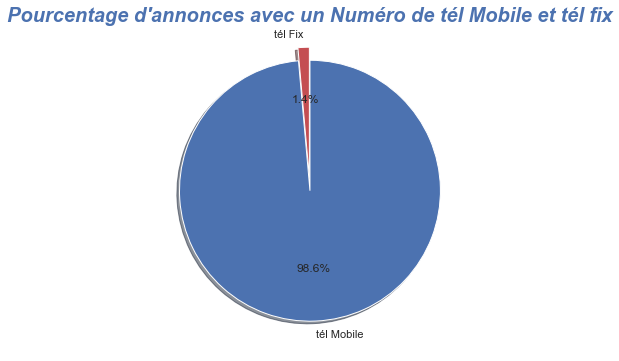

In [192]:
télmobil1=df2[df2.Téléphone > 600000000].count()['Nom']
télfix1=df2[df2.Téléphone < 600000000].count()['Nom']
print("Le nombre d'annonce qui contiennent un numéro de téléphone   :",télfix1+télmobil1,"\nLe nombre d'annonce totale                                   :",df2.count()['ID'])
télmobil=télmobil1*100/(télmobil1+télfix1)
télfix=télfix1*100/(télmobil1+télfix1)
print("Pourcentage d'annonces avec un Numéro de tél Mobile          : {:.2f}%\nPourcentage d'annonces avec un Numéro de tél Fix             : {:.2f}%".format(télfix,télmobil))

#remarque: toutes les annonces contiennent un numéreau de téléphones soit fix ou mobile.

cols=['r','b']
plt.figure(figsize = (6, 6))
plt.pie([télfix,télmobil],labels=['tél Fix','tél Mobile'],colors=cols,startangle=90,shadow=True,explode=(0.1,0),autopct='%1.1f%%')
title_obj=plt.title('Pourcentage d\'annonces avec un Numéro de tél Mobile et tél fix',fontsize=20,fontweight='bold',fontstyle='italic')
plt.setp(title_obj, color='b')

#Cela montre que le télephone fix est trés peu utiliser dans les annonces du site avito.

plt.show()

In [194]:
c=0
for x in df2['Titre']:
    x=str(x)
    if (ord(str(x[0]))>255):
        c+=1
print("Dans 71726 annonces on trouve",c,"annonces écrites en Arabe. C'est à dire {:.2f}% de totales des annonces.".format(c*100/71726))

#Pourcentage d'annonces écrites en arabe

Dans 71726 annonces on trouve 6241 annonces écrites en Arabe. C'est à dire 8.70% de totales des annonces.


In [195]:
#Pour cette partie nous avons préparé une dataframe contenant les annonces du 11/03, 12/03, 27/03, 28/03, 11/02 pour des statistiques sur le nombre d'annoces par chaque 2heurs.
df100=pd.read_excel("5jour.xlsx")
df100

,Unnamed: 0,ID,Nom,Titre,Catégorie,Prix,Ville,Téléphone,Date,Heur,Description
0,1,51145328,Mehdi Ghoulam,fourneau,POUR LA MAISON ET JARDIN,1000.0,Marrakech,684094538,2020-03-28,23:59:4,fourneau électriques et gaz kbir o ba9i jdide...
1,2,51145321,Abdo,IPhone 7 32gb,INFORMATIQUE ET MULTIMEDIA,1400.0,Rabat,667968623,2020-03-28,23:59:3,Slm 3andi iPhone 7 normal 32gb i touch sans ma...
2,3,51145318,Boussif,Velo,VEHICULES,NaN,Oujda,603670928,2020-03-28,23:59:2,Slm limahtam ysoni chokran
3,4,51145316,Majid,Iphone 7 black 128G,INFORMATIQUE ET MULTIMEDIA,2100.0,Tanger,663769393,2020-03-28,23:58:1,Iphone 7 noir 128G très bon état batteries 90...
4,5,51145323,Samid invest,Appartement,IMMOBILIER,40000.0,Sidi Rahal,670521550,2020-03-28,23:57:2,"Appartement haut standing à vendre,bien placé ..."
...,...,...,...,...,...,...,...,...,...,...,...
30092,30093,50220479,simonadiri,majmo3at toyour,LOISIRS ET DIVERTISSEMENT,NaN,Casablanca,772170393,2020-02-11,00:03:3,kayanin natawi mo9nin+ dakora mo9nin+ misto wi...
30093,30094,50220478,يونس بن تاويت,فوطوكوبي للبيع نقية,INFORMATIQUE ET MULTIMEDIA,2500.0,Tanger,663262090,2020-02-11,00:03:2,konica minolta bizhub350
30094,30095,50220475,Madame,studio meublé agdal rabat,IMMOBILIER,500.0,Rabat,777849079,2020-02-11,00:02:4,un studio meublé un chambre cuisine sdb 1 étag...
30095,30096,50220473,Hamza ougaamou,Iphone X,INFORMATIQUE ET MULTIMEDIA,5800.0,Rabat,668532370,2020-02-11,00:02:2,"Je met en vente mon iphone x256G , très bonne ..."


In [255]:
D=[]
for x in df100['Heur']:
    D=D+[x[:2]]
L=[] 
S=[]
for i in range (len(D)):
    if i!=0 and D[i]=='23' and D[i]!=D[i-1]:
        L=L+[S]
        S=[]
    S=S+[D[i]]
L=L+[S]

In [256]:
C=[0]*12
D=[]
for i in range (5):
    for j in range (len(L[i])):
        if L[i][j]=='00' or L[i][j]=='01':
            C[0]+=1
        elif L[i][j]=='02' or L[i][j]=='03':
            C[1]+=1
        elif L[i][j]=='04' or L[i][j]=='05':
            C[2]+=1
        elif L[i][j]=='06' or L[i][j]=='07':
            C[3]+=1
        elif L[i][j]=='08' or L[i][j]=='09':
            C[4]+=1
        elif L[i][j]=='10' or L[i][j]=='11':
            C[5]+=1
        elif L[i][j]=='12' or L[i][j]=='13':
            C[6]+=1
        elif L[i][j]=='14' or L[i][j]=='15':
            C[7]+=1
        elif L[i][j]=='16' or L[i][j]=='17':
            C[8]+=1
        elif L[i][j]=='18' or L[i][j]=='19':
            C[9]+=1
        elif L[i][j]=='20' or L[i][j]=='21':
            C[10]+=1
        elif L[i][j]=='22' or L[i][j]=='23':
            C[11]+=1
    D=D+[C]
    C=[0]*12
print("Samedi 28/03:",D[0],"\nVendredi 27/03:",D[1],"\nJeudi 12/03:",D[2],"\nMercredi 11/03:",D[3],"\nMardi 11/02:",D[4])

Samedi 28/03: [74, 59, 11, 37, 546, 789, 686, 641, 565, 566, 669, 428] 
Vendredi 27/03: [68, 42, 42, 29, 342, 616, 1064, 643, 559, 343, 435, 302] 
Jeudi 12/03: [318, 59, 24, 133, 840, 1503, 1217, 1297, 1062, 890, 991, 403] 
Mercredi 11/03: [292, 74, 41, 117, 835, 1373, 1270, 1173, 1085, 877, 784, 392] 
Mardi 11/02: [200, 84, 20, 90, 584, 831, 98, 0, 0, 368, 786, 430]


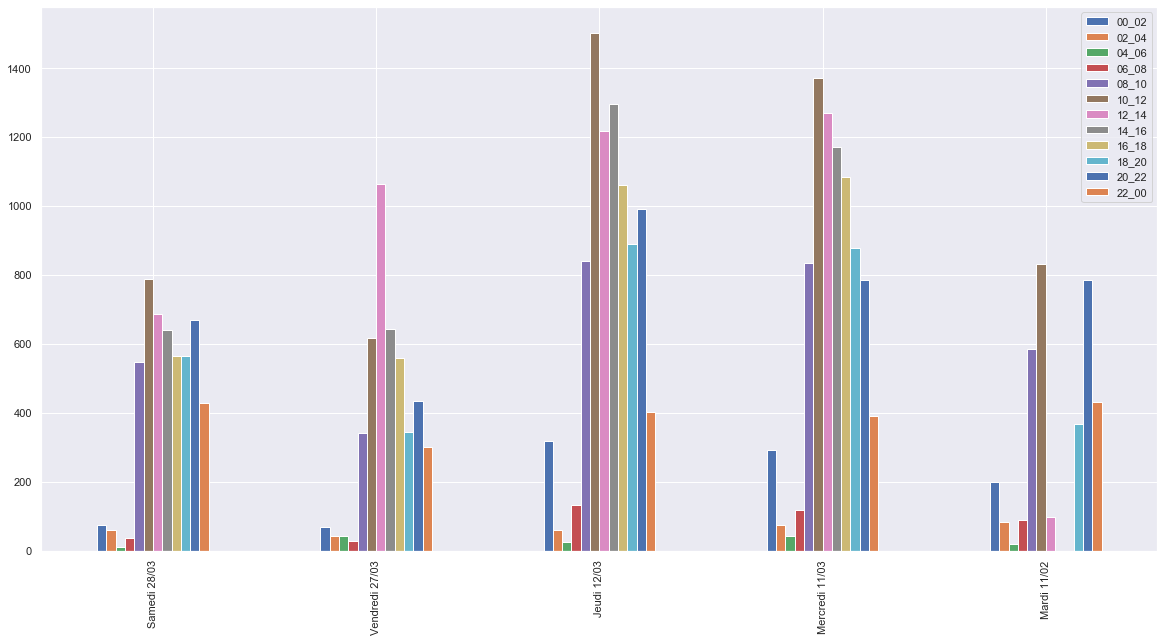

In [257]:
df200 = pd.DataFrame(D, index=['Samedi 28/03', 'Vendredi 27/03', 'Jeudi 12/03', 'Mercredi 11/03','Mardi 11/02'], columns=["00_02","02_04","04_06","06_08","08_10","10_12","12_14","14_16","16_18","18_20","20_22","22_00"])
df200.plot.bar(figsize=(20,10))
plt.show()

# Le Samedi 28/03:
# On remarque que de 00 à 08h trés peu d'annonces sont ajouté, cependant pendent la journés c.à.d. de 08h à 00h,  on remarque un taux variant entre 600 annonces et 800 annonces par 2heurs.
# Le Vendrdi 27/03:
# On remarque que de 00 à 08h trés peu d'annonces sont ajouté, cependant pendent la journés c.à.d. de 08h à 00h,  on remarque un taux variant entre 400 annonces et 1100 annonces par 2heurs, avec un enregistrement d'un pic entre 12h et 14h.
# Le Jeudi 12/03:
# On remarque que de 00 à 08h trés peu d'annonces sont ajouté, cependant pendent la journés c.à.d. de 08h à 00h,  on remarque un taux variant entre 800 annonces et 1500 annonces par 2heurs, avec un enregistrement d'un pic entre 10h et 12h.
# Le Mercredi 11/03:
# On remarque que de 00 à 08h trés peu d'annonces sont ajouté, cependant pendent la journés c.à.d. de 08h à 00h,  on remarque un taux variant entre 800 annonces et 1400 annonces par 2heurs, avec un enregistrement d'un pic entre 10h et 12h.
# Le Mardi 11/02:
# On remarque que de 00 à 08h trés peu d'annonces sont ajouté, cependant pendent la journés c.à.d. de 08h à 00h,  on remarque que entre 12h et 18h manque d'annonces (aucun enregistrement) cela peut etre expliqué par un bug du serveur durant ce temps.
# en génerale, tout au long de la journée plus annonce s'ajoute, surtout entre 10h et 16h. on remarque auusi qu'il ya une variation par raport au jours de la semaine.

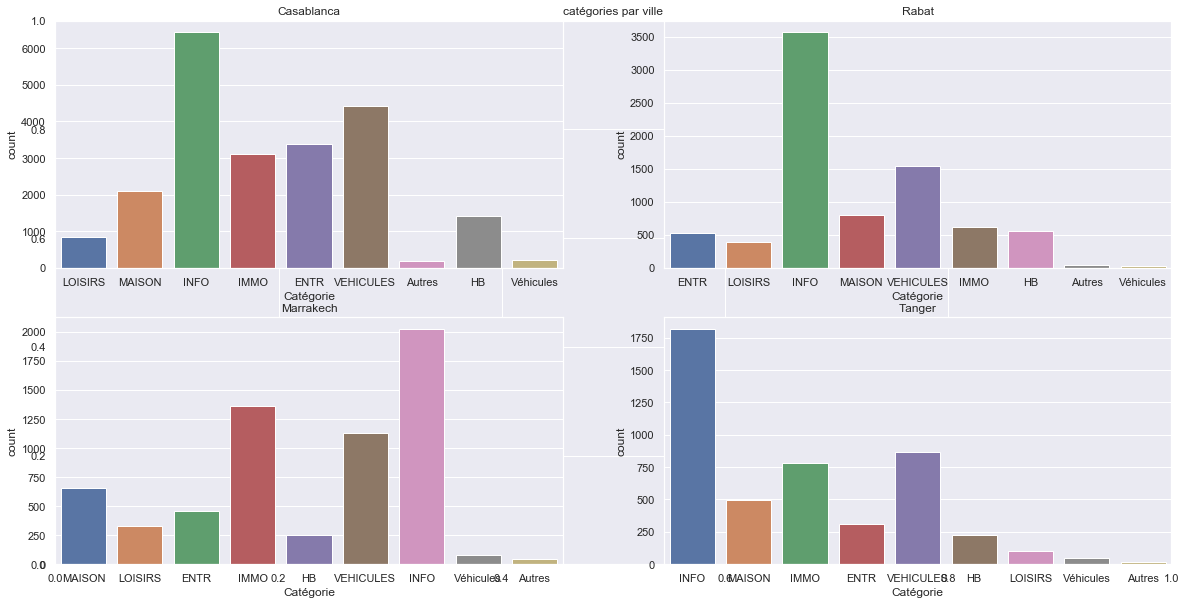

In [221]:
###pourcentage de catégories par ville
sns.set()
df = pd.read_excel('AvitoDatascraping10.xlsx')
pd.set_option('mode.chained_assignment', None)
for i in range(0,71745):
    if df.loc[:,('Catégorie')][i]=='LOISIRS ET DIVERTISSEMENT':
        df.loc[:,('Catégorie')][i]='LOISIRS'
    elif df.loc[:,('Catégorie')][i]=='POUR LA MAISON ET JARDIN':
        df.loc[:,('Catégorie')][i]='MAISON'
    elif df.loc[:,('Catégorie')][i]=='INFORMATIQUE ET MULTIMEDIA':
        df.loc[:,('Catégorie')][i]='INFO'
    elif df.loc[:,('Catégorie')][i]=='HABILLEMENT ET BIEN ETRE':
        df.loc[:,('Catégorie')][i]='HB'
    elif df.loc[:,('Catégorie')][i]=='Véhicules Professionnels':
        df.loc[:,('Catégorie')][i]='Véhicules'
    elif df.loc[:, ('Catégorie')][i] =='ENTREPRISES':
        df.loc[:, ('Catégorie')][i] ='ENTR'
    elif df.loc[:, ('Catégorie')][i] =='IMMOBILIER':
        df.loc[:, ('Catégorie')][i] ='IMMO'
        
Casablanca=df[df['Ville']=='Casablanca']['Catégorie']
Rabat=df[df['Ville']=='Rabat']['Catégorie']
Marrakech=df[df['Ville']=='Marrakech']['Catégorie']
Tanger=df[df['Ville']=='Tanger']['Catégorie']
fig = plt.figure(figsize=(20,10))
plt.title('catégories par ville')
ax1 = fig.add_subplot(2,2,1)
plt.title('Casablanca')
sns.countplot(Casablanca)
ax2 = fig.add_subplot(2,2,2)
plt.title('Rabat')
sns.countplot(Rabat)
ax3 = fig.add_subplot(2,2,3)
plt.title('Marrakech')
sns.countplot(Marrakech)
ax4 = fig.add_subplot(2,2,4)
plt.title('Tanger')
sns.countplot(Tanger)
# Nous avons représenté les nombres d'annonces par rapporte au catégories selon 4 grandes ville ('Casablanca','Rabat','Marrakech','Tanger')
# On peut remarquer que la catégorie INFO domine en nombre d'annonces dans toutes les villes.
# On peut remarquer aussi que l'IMMOBILIER prend la 2 éme place à marrakech et la 3 éme place à Tanger et Casablanca aprés la catégorie VEHICULE

plt.show()

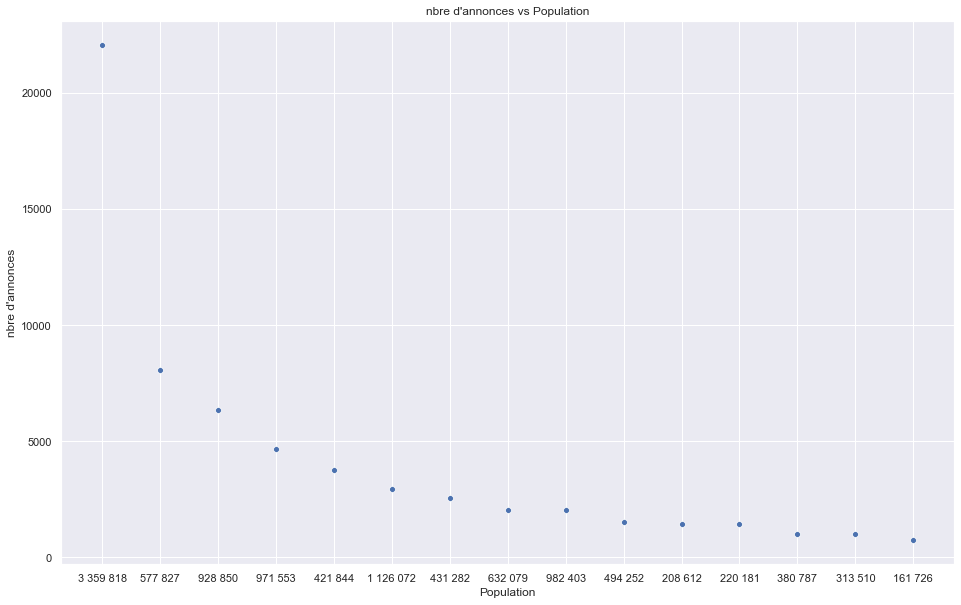

            nbre d'annonces Population
Casablanca            22038  3 359 818
Rabat                  8075    577 827
Marrakech              6337    928 850
Tanger                 4660    971 553
Agadir                 3773    421 844
Fès                    2950  1 126 072
Kénitra                2562    431 282
Meknès                 2047    632 079
Salé                   2025    982 403
Oujda                  1529    494 252
Mohammedia             1443    208 612
El Jadida              1423    220 181
Tétouan                1016    380 787
Temara                  984    313 510
Nador                   763    161 726


In [265]:
sns.set()
pd.set_option('mode.chained_assignment', None)
Ville=df2.Ville
S=Ville.value_counts()
A=S.to_frame()
B=A[0:15]
population=['3 359 818','577 827','928 850','971 553','421 844','1 126 072','431 282','632 079','982 403','494 252','208 612','220 181','380 787','313 510','161 726']
B['Population']=population
B.columns=['nbre d\'annonces','Population']
plt.figure(figsize=(16, 10))
ax = sns.scatterplot(x="Population", y="nbre d\'annonces", data=B)
plt.title('nbre d\'annonces vs Population')
plt.show()
print(B)
#Casablanca La ville économique par excellence.
#La population n'est pas le facteur déterminant du nombres d'annonces par exemple, la population à Rabat est de 577 827 et le nombres d'annonces est 8075, alors qu'a Fés malgré que la population est de 1 126 072 le nombre d'annonce ne depasse pas 3000.

Annonceurs: MOBILIER MOUADDINE ->>>> Nombres d'annonces: 1479
Annonceurs: Renault ->>>> Nombres d'annonces: 1322
Annonceurs: Stationdetravail ->>>> Nombres d'annonces: 1106
Annonceurs: HOME OF WORKSTATION ->>>> Nombres d'annonces: 1064
Annonceurs: Rendu ma ->>>> Nombres d'annonces: 1035
Annonceurs: Volkswagen ->>>> Nombres d'annonces: 1029
Annonceurs: Peugeot ->>>> Nombres d'annonces: 1019
Annonceurs: MSDS GROUP sarl ->>>> Nombres d'annonces: 921
Annonceurs: CARECO piece auto ->>>> Nombres d'annonces: 796
Annonceurs: ORIVORA ->>>> Nombres d'annonces: 791


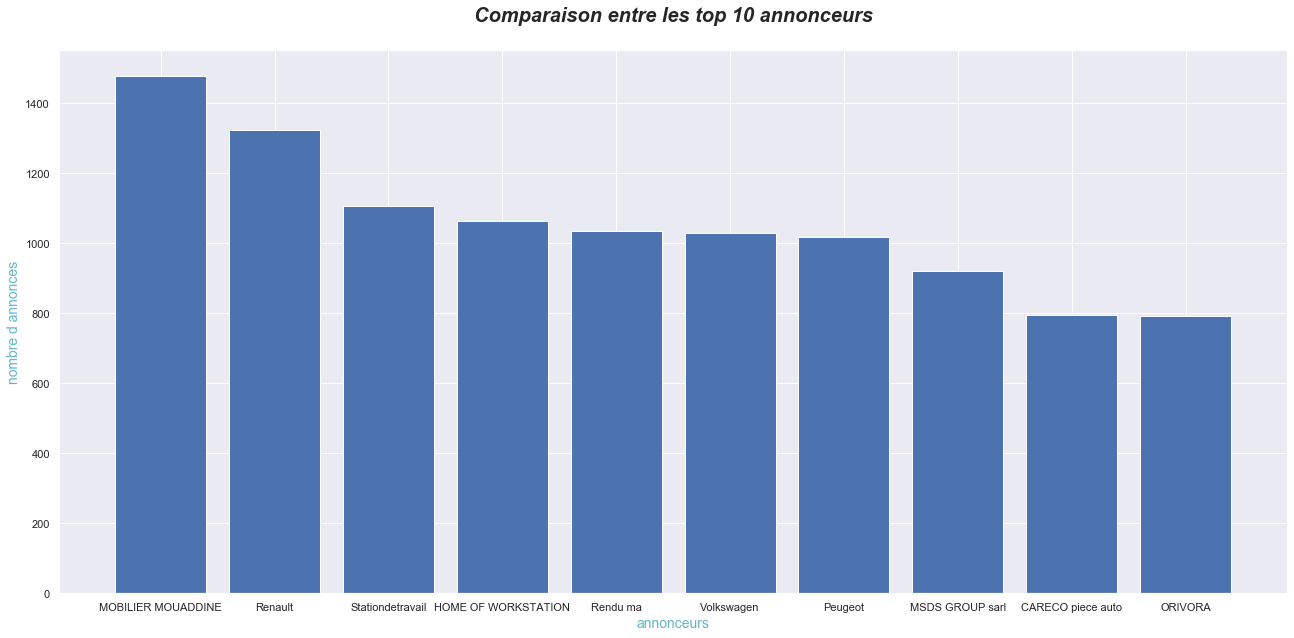

In [263]:
sns.set()
Nom=df2.Nom
S=Nom.value_counts()
##comparaison entre les top 10 annonceurs:
top10=[S.index[i] for i in range(10)]
top10[1]=top10[1][:-3]
top10[5]=top10[5][:-3]
top10[6]=top10[6][:-3]
valeurs=[S[i] for i in range(10)]
for i in range (10):
    print('Annonceurs:', top10[i],'->>>> Nombres d\'annonces:',valeurs[i])
plt.figure(figsize=(22, 10))
plt.bar(top10,valeurs)
plt.xlabel('annonceurs',fontvariant='small-caps',fontsize=14,color='c')
plt.ylabel('nombre d annonces',fontvariant='small-caps',fontsize=14,color='c')
plt.title('Comparaison entre les top 10 annonceurs\n',fontsize=20,fontweight='bold',fontstyle='italic');
plt.show()
#les top 10 annonceurs dominent presque le 1/4 des annonces 